## A text classifier based on a Markov Model to classify poems writted by prolificpoets, Robert Frost and Edgar Allan Poe

In [1]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/edgar_allan_poe.txt
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt

--2022-05-13 08:25:12--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/edgar_allan_poe.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26622 (26K) [text/plain]
Saving to: ‘edgar_allan_poe.txt’

edgar_allan_poe.txt 100%[===================>]  26.00K  --.-KB/s    in 0.001s  

2022-05-13 08:25:12 (17.5 MB/s) - ‘edgar_allan_poe.txt’ saved [26622/26622]

--2022-05-13 08:25:12--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/hmm_class/robert_frost.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split

In [3]:
input_files = [
  'edgar_allan_poe.txt',
  'robert_frost.txt',
]

In [4]:
!head edgar_allan_poe.txt

LO! Death hath rear'd himself a throne
In a strange city, all alone,
Far down within the dim west
Where the good, and the bad, and the worst, and the best,
Have gone to their eternal rest.
 
There shrines, and palaces, and towers
Are not like any thing of ours
Oh no! O no! ours never loom
To heaven with that ungodly gloom!


In [5]:
!head robert_frost.txt

Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth; 

Then took the other, as just as fair,
And having perhaps the better claim
Because it was grassy and wanted wear,
Though as for that the passing there


## Cleaning text data by removing white spaces, capitalizations and punctuations

In [6]:
# Collecting the data into lists
input_texts = [] # Empty list to hold the imput texts, i.e the poems
labels = [] # List to hold the labels, i.e the index value of the authors

for label, f in enumerate(input_files):
  print(f"{f} corresponds to the label {label}")

  for line in open(f):
    line = line.rstrip().lower() # removing the EOL space and turning all letters into lowercase
    line = line.translate(str.maketrans('', '', string.punctuation)) # Removing puncuation

    input_texts.append(line)
    labels.append(label)

edgar_allan_poe.txt corresponds to the label 0
robert_frost.txt corresponds to the label 1


In [7]:
# Splitting data into training and test sets
train_text, test_text, y_train, y_test= train_test_split(input_texts, labels)

In [8]:
len(y_train), len(y_test)

(1783, 595)

In [9]:
train_text[:5]

['in front of one town hall id left him hitched',
 'hed like to take me there and show it to me',
 'arose with a duplicate horn ',
 'it',
 'on something theres no harm see there he is']

In [10]:
y_train[:5]

[1, 1, 0, 1, 1]

## Creating a matrix with corresponding integer indices for every word in the training and test sets

In [12]:
idx = 1 # Setting the first index of matrix to 1 
word2idx = {'<unk>' : 0} # Setting unknown words in test set to zero

In [14]:
# Populating the matrix word2idx by converting words to their respective indices
for text in train_text:
  tokens = text.split() # tokenizing words
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx+= 1

In [15]:
# List of words and their respective indices
word2idx

{'<unk>': 0,
 'in': 1,
 'front': 2,
 'of': 3,
 'one': 4,
 'town': 5,
 'hall': 6,
 'id': 7,
 'left': 8,
 'him': 9,
 'hitched': 10,
 'hed': 11,
 'like': 12,
 'to': 13,
 'take': 14,
 'me': 15,
 'there': 16,
 'and': 17,
 'show': 18,
 'it': 19,
 'arose': 20,
 'with': 21,
 'a': 22,
 'duplicate': 23,
 'horn': 24,
 'on': 25,
 'something': 26,
 'theres': 27,
 'no': 28,
 'harm': 29,
 'see': 30,
 'he': 31,
 'is': 32,
 'the': 33,
 'fingerpieces': 34,
 'slid': 35,
 'all': 36,
 'directions': 37,
 'were': 38,
 'not': 39,
 'their': 40,
 'own': 41,
 'wings': 42,
 'until': 43,
 'they': 44,
 'trailed': 45,
 'dust': 46,
 'past': 47,
 'get': 48,
 'some': 49,
 'strangeness': 50,
 'out': 51,
 'wantonest': 52,
 'singing': 53,
 'birds': 54,
 'ultimate': 55,
 'climes': 56,
 'pole': 57,
 'hole': 58,
 'somewhere': 59,
 'his': 60,
 'heel': 61,
 'up': 62,
 'thrones': 63,
 'longforgotten': 64,
 'bowers': 65,
 'bells': 66,
 'ah': 67,
 'i': 68,
 'went': 69,
 'sleep': 70,
 'before': 71,
 'bed': 72,
 'lifts': 73,
 'gaun

In [16]:
len(word2idx)

2519

## Converting the data i.e the text files into a listof integers based on the matrix of indices 

In [20]:
# Convert data into integer format
train_text_int = []
test_text_int = []

for text in train_text:
  tokens = text.split()
  line_as_int = [word2idx[token] for token in tokens]
  train_text_int.append(line_as_int)

for text in test_text:
    tokens = text.split()
    line_as_int = [word2idx.get(token, 0) for token in tokens]
    test_text_int.append(line_as_int)

In [19]:
train_text_int[100:105]

[[33, 355, 235, 33, 356, 357, 17, 235, 15],
 [358, 33, 359, 3, 360, 361, 362],
 [28, 363, 364, 331, 17, 364, 365, 366],
 [],
 [40, 367, 368, 155, 33, 369, 3, 370]]

## Creating a Markov model
We will create A and pi matrices for the Markov modek
* `A`: State transition matrix, in this case transitioning from one word to the other
* `pi`: Initial state/ start state, int this case the first word in every sentence 

In [22]:
# Initialise A and pi matrices for both classes
V = len(word2idx)

A0 = np.ones((V,V))
pi0 = np.ones(V)


A1 = np.ones((V,V))
pi1 = np.ones(V)

In [24]:
# Compute counts for A and pi i.e. populating the matrix A and pi fields 
def compute_counts(text_as_int, A, pi):
  for tokens in text_as_int:
    last_idx = None
    for idx in tokens:
      if last_idx is None:
        # The first word in the sentence
        pi[idx]+= 1
        # Traversing sentence from one word to another
      else:
        A[last_idx, idx]+=1

      # Update the last index
      last_idx = idx

compute_counts([t for t, y in zip(train_text_int, y_train) if y == 0], A0, pi0)
compute_counts([t for t, y in zip(train_text_int, y_train) if y == 1], A1, pi1)      


In [26]:
# Normalise A and pi so that they become probability matrices 
A0 /= A0.sum(axis=1, keepdims=True)
pi0/= pi0.sum()

A1 /= A1.sum(axis=1, keepdims=True)
pi1/= pi1.sum()


In [27]:
# Using logarithmic probabilities
logA0 = np.log(A0)
logpi0 = np.log(pi0)

logA1 = np.log(A1)
logpi1 = np.log(pi1)

In [28]:
# Compute priors
count0 = sum(y==0 for y in y_train)
count1 = sum(y==1 for y in y_train)
total = len(y_train)
p0 = count0/total
p1 = count1/total
logp0 = np.log(p0)
logp1 = np.log(p1)
p0, p1


(0.3275378575434661, 0.6724621424565339)

## Building our classifier model by using the Markov property and the concept of Bayes Classifier
Simpliying Bayes decision rule to derive formula for k*
k* = argmax log p(poem|author=k) + log p(author=k)


In [32]:
# Build a classifier
class Classifier:
  def __init__(self, logAs, logpis, logpriors):
    self.logAs = logAs
    self.logpis = logpis
    self.logpriors = logpriors
    self.K = len(logpriors) # number of classes

  def _compute_log_likelihood(self, input_, class_):
    logA = self.logAs[class_]
    logpi = self.logpis[class_]

    last_idx = None
    logprob = 0
    for idx in input_:
      if last_idx is None:
        # it's the first token
        logprob += logpi[idx]
      else:
        logprob += logA[last_idx, idx]
      
      # update last_idx
      last_idx = idx
    
    return logprob
  
  def predict(self, inputs):
    predictions = np.zeros(len(inputs))
    for i, input_ in enumerate(inputs):
      posteriors = [self._compute_log_likelihood(input_, c) + self.logpriors[c] \
             for c in range(self.K)]
      pred = np.argmax(posteriors)
      predictions[i] = pred
    return predictions

In [33]:
# each array must be in order since classes are assumed to index these lists
clf = Classifier([logA0, logA1], [logpi0, logpi1], [logp0, logp1])

## Running the model and getting accuracy, f1_score,confusion matrix and classification report for train and test sets

In [34]:
ptrain = clf.predict(train_text_int)
print(f"Train Accuracy:{np.mean(ptrain==y_train)}")

Train Accuracy:0.968592260235558


In [35]:
ptest = clf.predict(test_text_int)
print(f"Test Accuracy:{np.mean(ptest == y_test)}")

Test Accuracy:0.7966386554621848


In [36]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [39]:
conf_matrix = confusion_matrix(y_train, ptrain)
conf_matrix

array([[ 528,   56],
       [   0, 1199]])

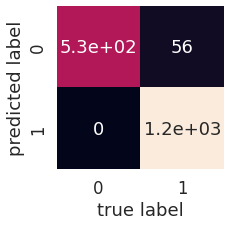

In [40]:
import seaborn as sns
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
 
 fig, ax = plt.subplots(figsize=(3, 3))
 ax = sns.heatmap(confusion_matrix(y_test, y_preds),
 annot=True, # Annotate the boxes
 cbar=False)
 plt.xlabel("true label")
 plt.ylabel("predicted label")
 
plot_conf_mat(y_train, ptrain)

In [41]:
conf_matrix = confusion_matrix(y_test, ptest)
conf_matrix

array([[101, 112],
       [  9, 373]])

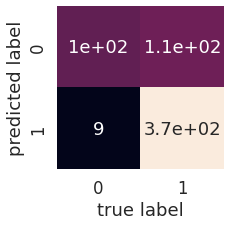

In [42]:
import seaborn as sns
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
 
 fig, ax = plt.subplots(figsize=(3, 3))
 ax = sns.heatmap(confusion_matrix(y_test, y_preds),
 annot=True, # Annotate the boxes
 cbar=False)
 plt.xlabel("true label")
 plt.ylabel("predicted label")
 
plot_conf_mat(y_test, ptest)

In [43]:
f1_score(y_train, ptrain)

0.9771801140994295

In [44]:
f1_score(y_test, ptest)

0.8604382929642445

In [45]:
# Obtaining a classification report on training set
print(classification_report(y_train, ptrain))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       584
           1       0.96      1.00      0.98      1199

    accuracy                           0.97      1783
   macro avg       0.98      0.95      0.96      1783
weighted avg       0.97      0.97      0.97      1783



In [46]:
# Obtaining classification report on test set 
print(classification_report(y_test, ptest))

              precision    recall  f1-score   support

           0       0.92      0.47      0.63       213
           1       0.77      0.98      0.86       382

    accuracy                           0.80       595
   macro avg       0.84      0.73      0.74       595
weighted avg       0.82      0.80      0.78       595



*******